In [6]:
import pandas as pd
import re
from typing import List, Dict
from HelperObjects.measureWeights import measures_2025
from fileCleaning import clean_medicare_advantage_data

folder_path = '../Data/Measure Data/csvs/'
file_paths = [
    "2020 Star Ratings Measure Data.csv",
    "2021 Star Ratings Measure Data.csv",
    "2022 Star Ratings Measure Data.csv",
    "2023 Star Ratings Measure Data.csv",
    "2024 Star Ratings Measure Data.csv",
    "2025 Star Ratings Measure Data.csv"
]


/Users/rteresi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/rteresi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [11]:
import os
os.getcwd()

'/Users/rteresi/Documents/Quality Measures/Scripts'

In [12]:
df = clean_medicare_advantage_data('../Data/MeasureData/csvs/', file_paths)
# drop plans with only one year
df = df.loc[lambda x: x.CONTRACT_ID.isin(df.groupby('CONTRACT_ID').size().loc[lambda x: x > 1].index)]

c_measure_cols = df.columns[df.columns.str.startswith('C:')]

2020
2021
2022
2023
2024
2025


#### Plan

Have a predictive model for each measure.

Simple. Following metrics:

    - Last year's metric for each measure
    - 2 year trend, if available
    - 3 year trend, if available 
    - something to shape curve around threshold - beta regression

Next gen analysis, include overall insurer statistics across plans

In [13]:
df.shape

(4112, 49)

(array([  1.,   0.,   1.,   0.,   0.,   2.,   2.,   0.,   1.,   1.,   6.,
          4.,   4.,  11.,   9.,  18.,  18.,  19.,  27.,  39.,  28.,  44.,
         43.,  40.,  49.,  41.,  51.,  80.,  74.,  60.,  70.,  84.,  79.,
         73., 101.,  90.,  76.,  72.,  55.,  47.,  50.,  40.,  41.,  28.,
         17.,  14.,   9.,  10.,   3.,   6.]),
 array([0.2935352 , 0.30598165, 0.31842809, 0.33087453, 0.34332097,
        0.35576741, 0.36821386, 0.3806603 , 0.39310674, 0.40555318,
        0.41799962, 0.43044607, 0.44289251, 0.45533895, 0.46778539,
        0.48023183, 0.49267828, 0.50512472, 0.51757116, 0.5300176 ,
        0.54246404, 0.55491049, 0.56735693, 0.57980337, 0.59224981,
        0.60469625, 0.6171427 , 0.62958914, 0.64203558, 0.65448202,
        0.66692846, 0.67937491, 0.69182135, 0.70426779, 0.71671423,
        0.72916067, 0.74160711, 0.75405356, 0.7665    , 0.77894644,
        0.79139288, 0.80383932, 0.81628577, 0.82873221, 0.84117865,
        0.85362509, 0.86607153, 0.87851798, 0.

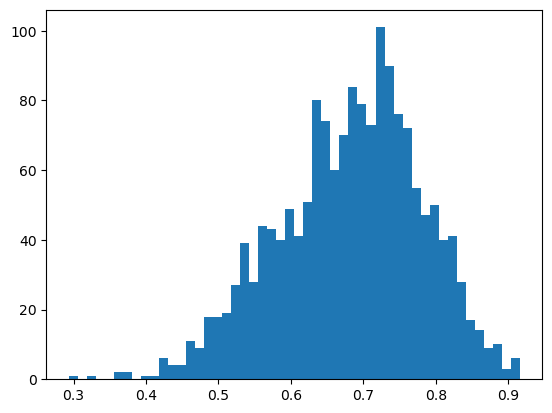

In [198]:

plt.hist(distribution.rvs(1638), bins=50)

In [307]:
thresholds['C11: Controlling High Blood Pressure']

[(-inf, 69.0, 1),
 (69.0, 74.0, 2),
 (74.0, 80.0, 3),
 (80.0, 85.0, 4),
 (85.0, inf, 5)]

In [305]:
sorted(distribution.rvs(1638))

[0.3267281925042219,
 0.3982400651238314,
 0.40324645358055694,
 0.40725083631403236,
 0.4132288324109065,
 0.4194757066779445,
 0.4220483958516512,
 0.423015283100983,
 0.4252498141955085,
 0.426854222182719,
 0.4281727622995315,
 0.43029790387042127,
 0.4306946479660365,
 0.4311338416822187,
 0.4312633770583721,
 0.4353768212351592,
 0.43591418466095505,
 0.4382200144712076,
 0.44101852578963907,
 0.4434594051858611,
 0.44538768551675606,
 0.447885543910718,
 0.4510054064213151,
 0.4515788792994928,
 0.45205664330008555,
 0.4537926507428206,
 0.45459922890915255,
 0.4569449410871518,
 0.4569960630259893,
 0.45803451674842366,
 0.46020027996078694,
 0.461103772174616,
 0.46370406292512284,
 0.4641045287248676,
 0.46515913576128926,
 0.46598787824842003,
 0.4660110478286339,
 0.4670649773729932,
 0.46912493931241017,
 0.4715844255896112,
 0.47158760152973617,
 0.47162944707941895,
 0.4719446877019984,
 0.47473454389103137,
 0.477985192998192,
 0.4785982260132704,
 0.4789044367513798,
 

In [264]:
threshold_df = pd.read_csv('Data/Cutpoints/2025 Star Ratings Part C Cut Points.csv', encoding='cp1252', skiprows=2)

# Create the thresholds dictionary
thresholds = create_measure_thresholds(threshold_df)


In [208]:
thresholds

{'C01: Breast Cancer Screening': [(-inf, 53.0, 1),
  (53.0, 67.0, 2),
  (67.0, 75.0, 3),
  (75.0, 82.0, 4),
  (82.0, inf, 5)],
 'C02: Colorectal Cancer Screening': [(-inf, 53.0, 1),
  (53.0, 65.0, 2),
  (65.0, 75.0, 3),
  (75.0, 83.0, 4),
  (83.0, inf, 5)],
 'C03: Annual Flu Vaccine': [(-inf, 61.0, 1),
  (61.0, 65.0, 2),
  (65.0, 71.0, 3),
  (71.0, 76.0, 4),
  (76.0, inf, 5)],
 'C04: Monitoring Physical Activity': [(-inf, 41.0, 1),
  (41.0, 47.0, 2),
  (47.0, 52.0, 3),
  (52.0, 60.0, 4),
  (60.0, inf, 5)],
 'C05: Special Needs Plan (SNP) Care Management': [(-inf, 46.0, 1),
  (46.0, 62.0, 2),
  (62.0, 76.0, 3),
  (76.0, 89.0, 4),
  (89.0, inf, 5)],
 'C06: Care for Older Adults – Medication Review': [(-inf, 53.0, 1),
  (53.0, 80.0, 2),
  (80.0, 92.0, 3),
  (92.0, 98.0, 4),
  (98.0, inf, 5)],
 'C07: Care for Older Adults – Pain Assessment': [(-inf, 60.0, 1),
  (60.0, 81.0, 2),
  (81.0, 92.0, 3),
  (92.0, 96.0, 4),
  (96.0, inf, 5)],
 'C08: Osteoporosis Management in Women who had a Fractu

In [269]:
import pandas as pd
import numpy as np

def calculate_star_ratings(scores_df: pd.DataFrame, 
                         thresholds: dict, 
                         measure_weights: dict) -> tuple:
    """
    Calculate star ratings and distances to next threshold for each measure
    
    Args:
        scores_df: DataFrame with measure scores
        thresholds: Dictionary of measure thresholds from create_measure_thresholds()
        measure_weights: Dictionary mapping measure names to their weights
        
    Returns:
        tuple: (star_ratings_df, distance_to_next_df, weighted_average)
    """
    # Initialize output DataFrames with same index as input
    star_ratings = pd.DataFrame(index=scores_df.index)
    distances = pd.DataFrame(index=scores_df.index)
    
    # Process each measure
    for measure in scores_df.columns:
        if measure not in measure_weights:
            continue
            
        # Get the measure's star ratings and distances
        stars = []
        next_thresholds = []
        
        for score in scores_df[measure]:
            if pd.isna(score):
                stars.append(np.nan)
                next_thresholds.append(np.nan)
                continue
                
            try:
                # Get star rating
                star = get_star_rating(measure, score, thresholds)
                stars.append(star)
                
                # Calculate distance to next threshold
                measure_ranges = thresholds[measure]
                current_range = [r for r in measure_ranges if r[2] == star][0]
                
                if star < 5:
                    next_range = [r for r in measure_ranges if r[2] == star + 1][0]
                    distance = next_range[0] - score
                else:
                    distance = 0
                    
                next_thresholds.append(distance)
                
            except (KeyError, ValueError):
                stars.append(np.nan)
                next_thresholds.append(np.nan)
        
        star_ratings[measure] = stars
        distances[measure] = next_thresholds
    
    # Calculate weighted average
    weighted_scores = []
    for idx in star_ratings.index:
        total_weight = 0
        total_score = 0
        
        for measure, weight in measure_weights.items():
            if measure in star_ratings.columns:
                star = star_ratings.loc[idx, measure]
                if not pd.isna(star):
                    total_score += star * weight
                    total_weight += weight
        
        if total_weight > 0:
            weighted_scores.append(total_score / total_weight)
        else:
            weighted_scores.append(np.nan)
    
    return star_ratings, distances, pd.Series(weighted_scores, index=scores_df.index)

def format_results(star_ratings: pd.DataFrame, 
                  distances: pd.DataFrame, 
                  weighted_avg: pd.Series,
                  measure_weights: dict) -> pd.DataFrame:
    """
    Format the results into a readable summary DataFrame
    """
    summary = pd.DataFrame()
    
    for measure in star_ratings.columns:
        if measure in measure_weights:
            summary[f"{measure} (Weight: {measure_weights[measure]})"] = star_ratings[measure].map(str) + \
                " stars (+" + distances[measure].round(3).map(str) + " to next)"
            
    summary['Weighted Average'] = weighted_avg.round(3).map(str) + " stars"
    
    return summary

# Example usage:
def main(scores_df, thresholds, measure_weights):
    # Calculate ratings and distances
    star_ratings, distances, weighted_avg = calculate_star_ratings(
        scores_df, thresholds, measure_weights
    )
    
    # Format results
    summary = format_results(star_ratings, distances, weighted_avg, measure_weights)
    
    return star_ratings, distances, weighted_avg, summary

results = main(df.loc[lambda x: x.CONTRACT_ID.str.startswith('H2226') & x.Year.eq('2025') , [col for col in df.columns if 'C:' in col and not  any([col.endswith(suffix) for suffix in ['_lag1', '_diff1', '_diff2', '_missing']])]],
     formatted_thresholds,
     measures_2025)

In [265]:
formatted_thresholds = {}

# take out C01, C02, ..., C25, etc. and just put C: measure name
for key in thresholds.keys():
    formatted_thresholds[key.split(':')[0][0] + ':' + key.split(':')[1]] = thresholds[key]

In [270]:
results[0]

,C: Breast Cancer Screening,C: Colorectal Cancer Screening,C: Annual Flu Vaccine,C: Monitoring Physical Activity,C: Special Needs Plan (SNP) Care Management,C: Care for Older Adults – Medication Review,C: Care for Older Adults – Pain Assessment,C: Osteoporosis Management in Women who had a Fracture,C: Diabetes Care – Eye Exam,C: Diabetes Care – Blood Sugar Controlled,...,C: Care Coordination,C: Complaints about the Health Plan,C: Members Choosing to Leave the Plan,C: Health Plan Quality Improvement,C: Plan Makes Timely Decisions about Appeals,C: Reviewing Appeals Decisions,C: Call Center – Foreign Language Interpreter and TTY Availability,C: Controlling Blood Pressure,C: Transitions of Care,C: Follow-up after Emergency Department Visit for People with Multiple High-Risk Chronic Conditions
4291,4,5,5,5,4,4,5,2,5,4,...,3,4,5,NaN,5,5,4,NaN,3,4


In [271]:
results[1]

,C: Breast Cancer Screening,C: Colorectal Cancer Screening,C: Annual Flu Vaccine,C: Monitoring Physical Activity,C: Special Needs Plan (SNP) Care Management,C: Care for Older Adults – Medication Review,C: Care for Older Adults – Pain Assessment,C: Osteoporosis Management in Women who had a Fracture,C: Diabetes Care – Eye Exam,C: Diabetes Care – Blood Sugar Controlled,...,C: Care Coordination,C: Complaints about the Health Plan,C: Members Choosing to Leave the Plan,C: Health Plan Quality Improvement,C: Plan Makes Timely Decisions about Appeals,C: Reviewing Appeals Decisions,C: Call Center – Foreign Language Interpreter and TTY Availability,C: Controlling Blood Pressure,C: Transitions of Care,C: Follow-up after Emergency Department Visit for People with Multiple High-Risk Chronic Conditions
4291,1.0,0,0,0,7.0,3.0,0,3.0,0,4.0,...,1.0,-inf,0,NaN,0,0,2.0,NaN,6.0,8.0


In [272]:
results[2]

4291    3.661538
dtype: float64

In [278]:
rating_cutoffs = [ 2.75, 3.25, 3.75, 4.25, 4.75]
# get the sum of weights for columns with non NA values
print(results[0].apply(lambda x: np.sum([measures_2025[col] for col in x.dropna().index]), axis=1).values)

# get next highest cutoff for results 3.66
next_highest_cutoff = min([cutoff for cutoff in rating_cutoffs if cutoff > 3.66])

# sum of weights in calculation
sum([measures_2025[col] for col in results[0].iloc[0].dropna().index])

# get the number of points needed to get to next star rating
points_needed = next_highest_cutoff * sum([measures_2025[col] for col in results[0].iloc[0].dropna().index]) - sum([measures_2025[col] for col in results[0].iloc[0].dropna().index]) * 3.66

[65]


5.849999999999994

In [287]:
improvement_path = main(results, measures_2025, 3.66, 3.75)
print(improvement_path)


To reach 3.75 stars, improve these 12 measures:
- C: Care Coordination: 1.000 points needed (weight: 4)
- C: Rating of Health Care Quality: 1.000 points needed (weight: 4)
- C: Customer Service: 1.000 points needed (weight: 4)
- C: Getting Needed Care: 2.000 points needed (weight: 4)
- C: Call Center – Foreign Language Interpreter and TTY Availability: 2.000 points needed (weight: 4)
- C: Getting Appointments and Care Quickly: 2.000 points needed (weight: 4)
- C: Statin Therapy for Patients with Cardiovascular Disease: 1.000 points needed (weight: 1)
- C: Breast Cancer Screening: 1.000 points needed (weight: 1)
- C: Medication Reconciliation Post-Discharge: 1.000 points needed (weight: 1)
- C: Plan All-Cause Readmissions: -3.000 points needed (weight: 3)
- C: Diabetes Care – Blood Sugar Controlled: 4.000 points needed (weight: 3)
- C: Osteoporosis Management in Women who had a Fracture: 3.000 points needed (weight: 1)
                                              Measure  Weight  \
12

In [291]:
from IPython.display import display

display(improvement_path)

,Measure,Weight,Distance_to_Next,Distance_per_Weight,Cumulative_Weight,Cumulative_Rating_Impact
12,C: Care Coordination,4,1.0,0.250,4,3.722
11,C: Rating of Health Care Quality,4,1.0,0.250,8,3.783
10,C: Customer Service,4,1.0,0.250,12,3.845
8,C: Getting Needed Care,4,2.0,0.500,16,3.906
14,C: Call Center – Foreign Language Interpreter ...,4,2.0,0.500,20,3.968
9,C: Getting Appointments and Care Quickly,4,2.0,0.500,24,4.029
7,C: Statin Therapy for Patients with Cardiovasc...,1,1.0,1.000,25,4.045
0,C: Breast Cancer Screening,1,1.0,1.000,26,4.060
5,C: Medication Reconciliation Post-Discharge,1,1.0,1.000,27,4.075
6,C: Plan All-Cause Readmissions,3,-3.0,1.000,30,4.122
